** Deep Learning: Group Assignment**
--

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)


d:\Code\IISC\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 612M/612M [05:48<00:00, 1.84MB/s] 

Extracting files...


Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [4]:
!mkdir content 


The syntax of the command is incorrect.


**Traffic Sign Recognition: Taher’s Model and Modifications**
--

Taher's Traffic Sign Recognition model is an important step in the field of intelligent transportation systems, since it improves road safety by correctly identifying traffic signs. Taher's model, which is based on Convolutional Neural Networks (CNNs), performs well in identifying a variety of traffic sign types.

Understanding the value of ongoing development, we have set out to enhance Taher's concept even further. Our goal is to improve the model's accuracy and usefulness in everyday use by making careful adjustments and improvements. We have included the InceptionV3 pre-trained model, a complex architecture well-known for image classification applications, by utilizing the power of Transfer Learning.

We have optimized Taher's original model by carefully adding Conv2D, MaxPool2D, Dense, Flatten, and Dropout layers in addition to implementing InceptionV3. By adjusting the architecture to the subtleties of traffic sign identification, these changes seek to take advantage of the rich characteristics that InceptionV3 has learnt. The result is a hybrid model with increased accuracy and robustness that skilfully combines the advantages of a pre-trained model with task-specific modifications.

Importing Libraries and Setting Up Environment
--

NumPy, Pandas, Matplotlib, OpenCV, TensorFlow, and other required libraries are imported in the first code blocks. Taher makes sure that the environment is suitable for creating and using deep learning models for traffic sign recognition. The role of this libraries is as follows
- The NumPy is used to perfom the scientific computing in Python. It is used for numberic operation and arrays handling, which will play a vital role in image processing and manipulation.
- The Pandas is powerful libary for handling the data, that provides the data structure for efficient data analysis. Also it can handle the tabular data efficiently. It was used to read the data from the CSV file and perfoming data exploration.
- Matplotlib is 2D plotting library used to provide visualizations in Python. It is used for charting performance measures including loss and accuracy over training epochs, presenting visuals, and visualizing data distributions.
- For operations involving the loading, resizing, and manipulation of images, OpenCV is utilized. In computer vision applications, such as preprocessing pictures for deep learning model training, it is an invaluable tool.
- TensorFlow is developed by Google which an open source deep learning framework. It provides tools and librires which can be used for deep learning models. It is a core library used in the development, testing, and training of deep learning models. It has features for creating neural networks, specifying loss functions, training and improving models.
- PIL is Python Imaging library which will be used for loading and resizing the images. It helps the OpenCV in image processing.
- The OS and pathlib libraries are used for reading the folder directories of input dataset, which can also be used for loading datasheets and saving model files.
- A library called Random can be utilized as an alternative optimizer while teaching neural networks. It is selected based on trial and error method also for possible advantages of particular issue.
- The sklearn named Scikit-learn is used to calculate the model perfomance. the train_test_split is a function which will commonly used to splitting datasets into traning and testing sets.
- Pre-trained models, such as MobileNetV2, VGG19 are accessed via TensorFlow Hub and utilized as basic models for transfer learning. It makes easier to incorporate pre-trained models into unique structures.

We are using the pre tranied transfer learning model which is **Transfer Learning with InceptionV3** for this we are importing the libraries and also given the overview about them below.

__InceptionV3 Model Import__
- Imports the pre-trained InceptionV3 model, a widely used architecture for image classification applications. Using InceptionV3's transfer learning feature, one may improve performance on a particular task by applying the information gleaned from a big dataset (ImageNet).

__Image Preprocessing and Decoding Libraries__
- **image**: This will help us to import and prepare photos before supplying them to a neural network.
- **preprocess_input**: It includes InceptionV3-specific preparation methods to make sure input photos are prepared appropriately before prediction.
- **decode_predictions**: This will generate a list of (class, description, probability) for every prediction by translating the outcomes of the predictions into human-readable labels.

__Layers for Custom Model__
- **Conv2D**: Convolutional layer for 2D spatial convolution.
- **MaxPool2D**: Max pooling layer for down sampling  spatial dimensions.
- **Dense**: Fully connected layer.
- **Flatten**: Input must be compressed in order to go from convolutional layers to fully connected layers.
- **Dropout**: A regularization method that, in order to minimize overfitting, randomly sets some of the input units to zero during training.

The code in this patch indicates a move toward Transfer Learning using the InceptionV3 architecture. The chosen libraries allow extra layers to be designed for a bespoke model that customizes the architecture to the particular Traffic Sign Recognition problem, in addition to including InceptionV3 as the foundation model. Conv2D, MaxPool2D, Dense, Flatten, and Dropout layers are incorporated to enable the development of a unique model that makes use of the characteristics acquired by InceptionV3 and adjusts to the subtleties of the traffic sign dataset. By adding task-specific modifications to a pre-trained model, this method seeks to improve both model performance and resilience.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19

# Transfer Learning with InceptionV3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score


#import dagshub
#dagshub.init(repo_owner='kauskumb',
#             repo_name='IISC',
#             mlflow=True)

import mlflow

mlflow.autolog()
mlflow.set_tracking_uri("http://localhost:5050")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024/11/18 21:59:07 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.6.0. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2024/11/18 21:59:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/11/18 21:59:07 WARNING mlflow.utils.autologging_utils: MLflow tensorflow autologging is known to be compatible with 2.7.4 <= tensorflow <= 2.17.0, but the installed version is 2.18.0. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a compatible version, or try upgrading MLflow.
2024/11/18 21:59:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/11/18 21:59:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Num GPUs Available:  0


Data Directories and Image Dimensions
--

__Data Directories:__
- The variable data_dir will store the folder path of where the German Traffic Sign Recognition Benchmark (GTSRB) dataset is located.
- The variable train_path will store the folder path of the training set within the GTSRB dataset.
- The variable test_path will store the folder path of the test set within the GTSRB dataset.

__Image Dimensions:__
- Sets the major image parameters like height and width to 50 pixels each.

In [2]:
data_dir = 'content/'
train_path = 'content/Train/'
test_path = 'content/Test/'
height = 50
width = 50

Traffic Sign Classes
--

- This block builds a dictionary named classes, which associates class indices with description of traffic signs. A distinct traffic sign class is represented by each key-value pair in the dictionary.
- Using this dictionary, the model's output is decoded to provide human-readable labels for every type of predicted traffic signs.
- By linking descriptive strings with numerical class indices, it facilitates awareness of the model's predictions for traffic sign identification.(D. Yasmina, 2018)(Myat Nyein Chan, 2021)

In [3]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }


Batch Size and Seed
--

__Batch Size:__
- Determines the batch size for neural network training. The quantity of training samples used in a single iteration is referred to as the batch size. While smaller batches may help with regularization and occasionally converge more quickly, bigger batches can speed up computing.

__Seed:__
- Sets the seed for generating random numbers. Maintaining repeatability requires this. By establishing a seed, random operations (such as data shuffling and weight initialization) become deterministic, guaranteeing that the same code executed with the same seed will produce the same outcomes. This helps with consistency of results and troubleshooting.

In [4]:
batch_size = 150
seed = 42

Image Data Generators
--

This code block creates ImageDataGenerator objects to make it easier to import and enhance picture data for the model's training and testing.

__Training Data Generator:__
- For the training dataset, an ImageDataGenerator is constructed with different preprocessing and data augmentation settings. This features a validation split of 20%, rescaling pixel values to the range [0, 1] (rescale=1./255), and other picture loading parameters.
- The supplied directory is used to produce training data batches using the "flow_from_directory" technique. It has configurations for class mode, seed, goal size, and batch size.

With the help of these generators, training and testing deep learning models may be conducted efficiently on big datasets by applying normalization and augmentation to the data in batches of preprocessed pictures.tures.

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


Data Visualization: Sample Images
--

This code block creates a subplot grid to show a selection of the training dataset's photos and the labels that go with them. This code block imports a batch of photos and their respective labels from the training dataset, creates a 3x4 subplot grid using Matplotlib, and then shows a selection of these images and their labels in the subplot grid. Checking the training data and making sure the labels and pictures are loaded correctly are made easier with the aid of this visualization. Out of the batch, the photographs are selected at random to be shown. For better visibility, we may can change the subplot grid's size and layout options.

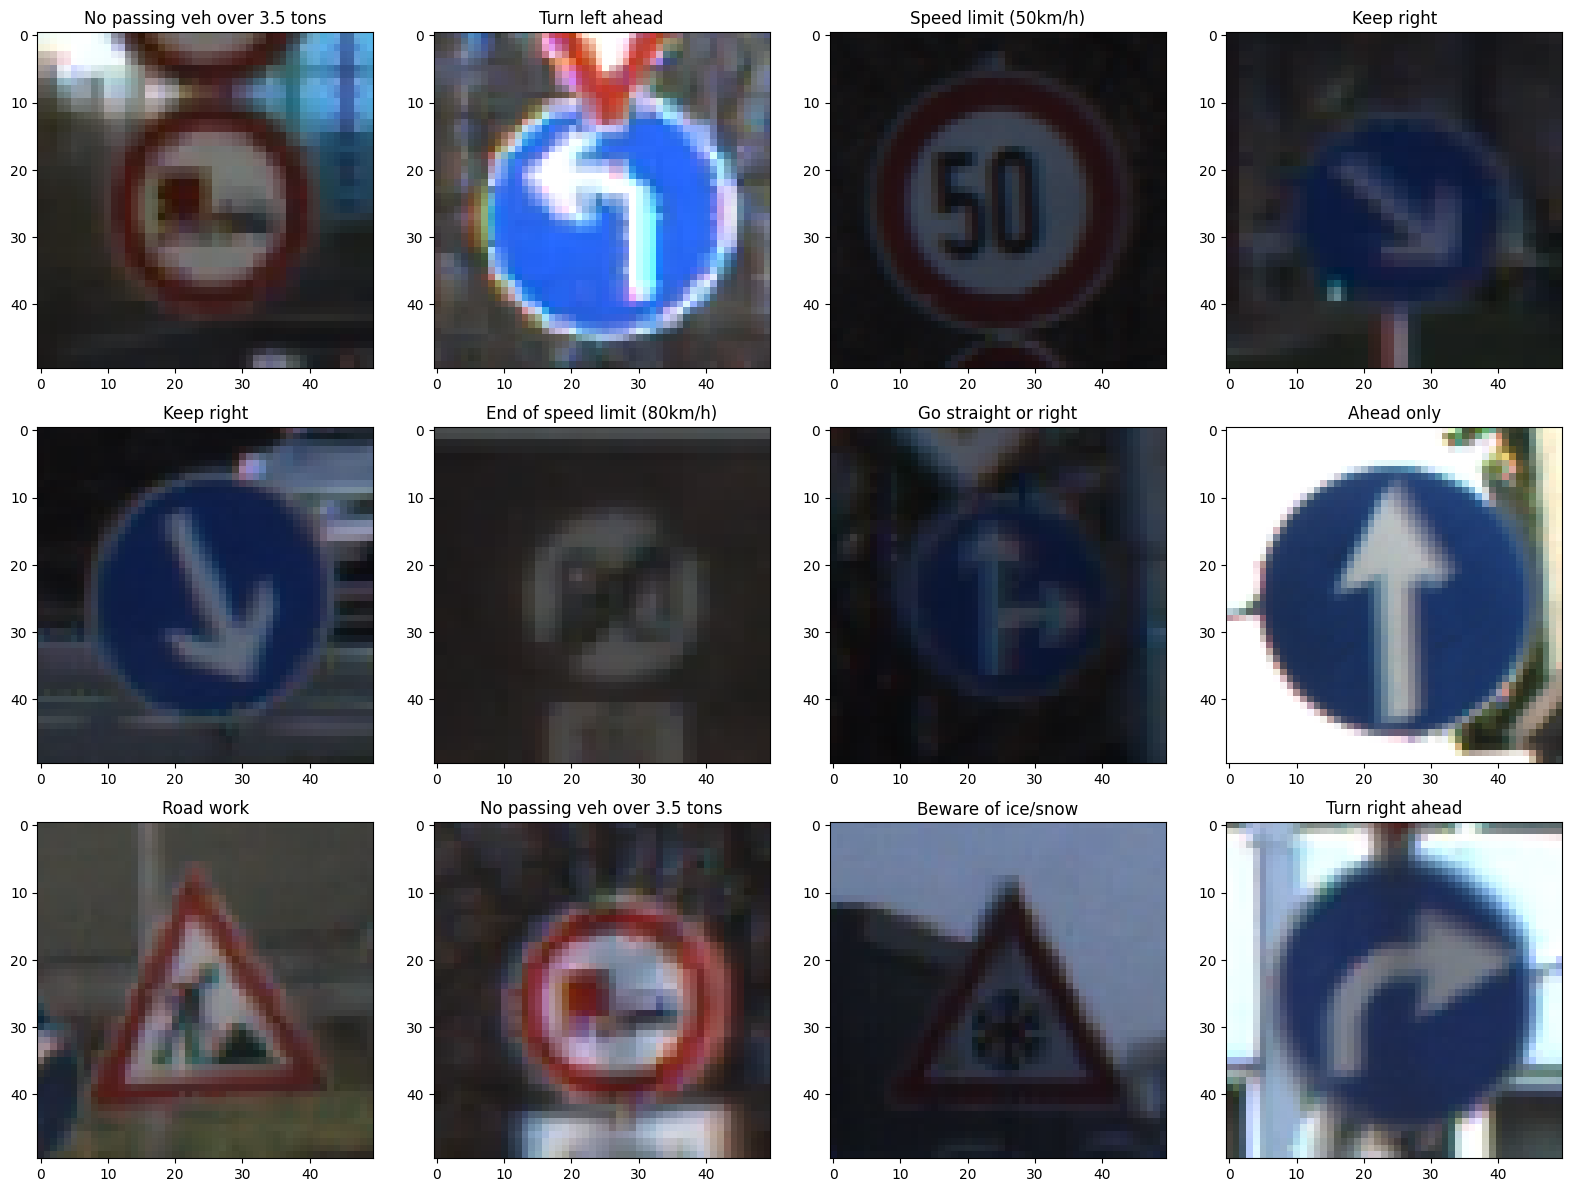

In [6]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = next(iter(train_dataset))
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

Convolutional Neural Network (CNN) Architecture
--

Using Keras' Sequential API, this code block constructs a Convolutional Neural Network (CNN) model.

__Tahers Work__

This CNN architecture consists of the following layers:
- __Convolutional Layers:__
Two convolutional layers with ReLU activation, kernel size of 5, and filters of 16 and 32. Input pictures size is of form (height, width, 3: which are already set) will sent into the first layer.
- __MaxPooling Layer:__
Using a pool size of (2, 2), the MaxPooling layer reduces computational complexity of the network and controlls overfitting.
- __Batch Normalization:__
After every convolutional layer, batch normalization is used to speed up and stabilize the training process.
- __Additional Convolutional Layers:__
Following two additional MaxPooling layers and Batch Normalization layers, there are two more convolutional layers with 64 filters, kernel sizes (3, 3), and ReLU activation. To avoid overfitting, a dropout layer with a dropout rate of 0.25 is introduced.
- __Flatten Layer:__
To transform the 2D feature maps into a 1D vector, which flattens the layer.
- **Dense(Fully Connected)Layers:**
ReLU activation and 512 neurons make up a dense layer. Batch normalization and dropout are used for regularization after that.
- __Output Layer__
The output layer for multiclass classification uses softmax activation and has 43 neurons, which corresponds to the number of traffic sign classes.

The purpose of this model architecture is to do picture classification tasks, specifically traffic sign recognition. The fully connected layers base their predictions on the hierarchical information that the convolutional layers have captured. For better generalization and regularization during training, batch normalization and dropout are added.(Shiyun Kong, 2023)

__Modification and Reason for Modification__

**Increased Depth:**

*   Tahers Model: Utilized two sets of convolutional layers
*   Modified Model: To improve the model's ability to extract organizational features from the data, a second set of convolutional layers(Shiyun Kong, 2023) (Conv2D) was added.

**Increased Complexity:**

*   Tahers Model: Using a model of small size with a limited quantity of convolutional layers.
*   Modified Model: In an effort to capture more complicated patterns in the photos of the traffic signs, extra convolutional layers were added to the model, increasing its complexity.

**Dropout Rate Adjustment:**

*   Tahers Model: Dropout rate set to 0.25 in specific layers.
*   Modified Model: For regularization, the dropout rate in some layers was changed to 0.5, which prevented overfitting and promoted generalization.

The modifications attempt to enhance and extend the model's learning ability, addressing the complexities of traffic sign identification and pushing for higher accuracy. The adjustments are made to improve performance on the traffic sign dataset by striking a balance between generalization and model complexity.(O. Keiron, 2015)

In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'), #input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Dropout(rate=0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

Model Compilation
--

The neural network model is assembled using certain training configurations in this code block.
- __Learning Rate:__
The learning rate(alpha) is set to 0.01. One hyperparameter that regulates the step size during optimization is the learning rate. While a smaller learning rate is often chosen to ensure a stable and smooth convergence. It also runs the risk of exceeding the ideal values.
- __Number of Epochs:__
There are fifteen epochs in all. One whole run through the whole training dataset is referred to as an epoch. The model may learn from the data across several iterations by training over multiple epochs.
- __Optimizer:__
The optimization process selects the Adam optimizer, which has a 0.01 learning rate. Adam is a well-liked optimization technique that may accelerate resolution by adjusting the learning rates for each parameter separately.
- __Model Compilation:__
Sets up the model for instruction. The optimizer, evaluation measure ('accuracy'), and loss function ('categorical_crossentropy' for multi-class classification) are all configured.

By defining how the model should learn from the data, what loss function to minimize, and what metrics to watch throughout training, this stage gets the model ready for training.(M. Sheng, 2018)

In [11]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model Training
--

- __Training Data__: The dataset that the fit function was trained on. The model is trained using this dataset.

- __Steps per Epoch:__ The number of training dataset steps (batches) that must be processed before going on to the following epoch. The training dataset's length is what it is configured to.

- __Number of Epochs:__ Total number of epochs during which the model is going to be trained.

- __Data Validation:__
The validation dataset used to assess the performance of the model at the end of every epoch.

- __Validation Steps:__ The number of steps (batches) to process from the validation dataset at the conclusion of each epoch will be decided by length of testting dataset.

- __Training History:__ Each epoch's training and validation loss and accuracy are recorded in the training history, which is kept in the history variable.

The training phase is started by this function, during which the model changes its weights, learns from the training data, and is assessed using the validation data. Analyzing the model's performance and possible over, or underfitting during training may be done with the help of the training history.(A. Krizhevsky, 2012)

In [12]:
    
import mlflow.sklearn
from mlflow import MlflowClient
def print_auto_logged_info(r):
    tags = {k: v for k, v in r.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in MlflowClient().list_artifacts(r.info.run_id, "model")]
    print(f"run_id: {r.info.run_id}")
    print(f"artifacts: {artifacts}")
    print(f"params: {r.data.params}")
    print(f"metrics: {r.data.metrics}")
    print(f"tags: {tags}")


with mlflow.start_run() as run:
    history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=10)


run_id=run.info.run_id
# fetch the auto logged parameters and metrics for ended run
print_auto_logged_info(mlflow.get_run(run_id))    

2024/11/18 21:59:26 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential' has no defined input shape yet.
2024/11/18 21:59:26 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2024/11/18 21:59:26 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
d:\Code\IISC\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.4662 - loss: 2.3010

d:\Code\IISC\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


210/210 ━━━━━━━━━━━━━━━━━━━━ 79s 352ms/step - accuracy: 0.4673 - loss: 2.2954 - val_accuracy: 0.8027 - val_loss: 0.8554
Epoch 2/15


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7833 - val_loss: 0.9046
Epoch 3/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9458 - loss: 0.1801

210/210 ━━━━━━━━━━━━━━━━━━━━ 61s 289ms/step - accuracy: 0.9458 - loss: 0.1801 - val_accuracy: 0.8427 - val_loss: 0.7534
Epoch 4/15


210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8393 - val_loss: 0.6977
Epoch 5/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.9714 - loss: 0.0956

210/210 ━━━━━━━━━━━━━━━━━━━━ 66s 312ms/step - accuracy: 0.9714 - loss: 0.0956 - val_accuracy: 0.9547 - val_loss: 0.1911
Epoch 6/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9531 - val_loss: 0.2052
Epoch 7/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 62s 296ms/step - accuracy: 0.9832 - loss: 0.0572 - val_accuracy: 0.9373 - val_loss: 0.3258
Epoch 8/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9433 - val_loss: 0.2727
Epoch 9/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 65s 307ms/step - accuracy: 0.9854 - loss: 0.0490 - val_accuracy: 0.9493 - val_loss: 0.2671
Epoch 10/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9527 - val_loss: 0.2140
Epoch 11/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 63s 301ms/step - accuracy: 0.9836 - loss: 0.0545 - val_accuracy: 0.9340 - val_loss: 0.3784
Epoch 12/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 -

210/210 ━━━━━━━━━━━━━━━━━━━━ 66s 312ms/step - accuracy: 0.9866 - loss: 0.0489 - val_accuracy: 0.9693 - val_loss: 0.1297
Epoch 14/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9567 - val_loss: 0.1892
Epoch 15/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.9931 - loss: 0.0216

210/210 ━━━━━━━━━━━━━━━━━━━━ 69s 326ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9813 - val_loss: 0.0885


2024/11/18 22:08:25 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2024/11/18 22:08:25 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/11/18 22:08:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 22:08:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run treasured-sponge-327 at: http://localhost:5050/#/experiments/0/runs/abe2af5f84a649cea358f9ccbb9a2eba.
2024/11/18 22:08:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5050/#/experiments/0.


run_id: abe2af5f84a649cea358f9ccbb9a2eba
artifacts: ['model/MLmodel', 'model/conda.yaml', 'model/data', 'model/python_env.yaml', 'model/requirements.txt']
params: {'batch_size': 'None', 'class_weight': 'None', 'epochs': '15', 'initial_epoch': '0', 'opt_amsgrad': 'False', 'opt_beta_1': '0.9', 'opt_beta_2': '0.999', 'opt_clipnorm': 'None', 'opt_clipvalue': 'None', 'opt_ema_momentum': '0.99', 'opt_ema_overwrite_frequency': 'None', 'opt_epsilon': '1e-07', 'opt_global_clipnorm': 'None', 'opt_gradient_accumulation_steps': 'None', 'opt_learning_rate': '0.009999999776482582', 'opt_loss_scale_factor': 'None', 'opt_name': 'adam', 'opt_use_ema': 'False', 'opt_weight_decay': 'None', 'sample_weight': 'None', 'shuffle': 'True', 'steps_per_epoch': '210', 'validation_batch_size': 'None', 'validation_freq': '1', 'validation_split': '0.0', 'validation_steps': '10'}
metrics: {'accuracy': 0.9921894669532776, 'loss': 0.02442299574613571, 'validation_accuracy': 0.981333315372467, 'validation_loss': 0.088521

Model Summary
--

The architecture and parameters of the specified neural network are summarized by the function "model.summary(),".

- __Model Architecture:__ Layers are added to the model in a sequential fashion since it is a sequential model.
- __Layers__: Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, and Dense layers make up the architecture
- __Output Shape__ : Every layer has a defined output.
- __Parameters__: Each layer's total number of weights and biases is displayed. Both teachable and untrainable.
- __Trainable and Non-trainable Parameters:__
Shows the total number of parameters as well as trainable and non-trainable parameters.

This overview helps us to understand the complex nature of the model by giving an overview of the amount of parameters and the layout of the neural network layers.

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 42, 42, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 21, 21, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 19, 19, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 17, 17, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,962,979 (11.30 MB)

 Trainable params: 987,083 (3.77 MB)

 Non-trainable params: 1,728 (6.75 KB)

 Optimizer params: 1,974,168 (7.53 MB)

Saving the Custom CNN Model
--

With this line, the complete Custom CNN model including the weights, settings, and architecture is saved to a file called "CNN.h5." It is usual practice to save models in the Hierarchical Data Format (HDF5) using the ".h5" extension.

In [37]:

model.save("CNN.keras")
model.save("CNN.h5")



In [15]:
uri=mlflow.get_tracking_uri()
print(uri)

artifact_name = 'model'
model_name = 'CNN'
mlflow.register_model(f'runs:/{run_id}/{artifact_name}', model_name)


http://localhost:5050


Successfully registered model 'CNN'.
2024/11/18 22:22:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: CNN, version 1
Created version '1' of model 'CNN'.


<ModelVersion: aliases=[], creation_timestamp=1731948779533, current_stage='None', description='', last_updated_timestamp=1731948779533, name='CNN', run_id='abe2af5f84a649cea358f9ccbb9a2eba', run_link='', source='mlflow-artifacts:/0/abe2af5f84a649cea358f9ccbb9a2eba/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>

In [ ]:
import mlflow.models
import mlflow.models.docker_utils
import mlflow.tensorflow
import tensorflow as tf

import tempfile
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

print (run_id)
mlflow.end_run()


model_dir = "./model"
model_version = 1
model_export_path = f"{model_dir}/{model_version}"

tf.saved_model.save(
    model,
    export_dir=model_export_path,
)

mlflow.models.build_docker(
    model_uri=f"runs:/{run_id}/model",
   name="CNN",
    enable_mlserver=False
)

abe2af5f84a649cea358f9ccbb9a2eba
INFO:tensorflow:Assets written to: ./model/1\assets


INFO:tensorflow:Assets written to: ./model/1\assets


CNN Model Performance Visualization
--

__Performance DataFrame:__
- performance = pd.DataFrame(mob_history.history): Converts the training history (loss and accuracy values for each epoch) into a Pandas DataFrame for easy plotting.

__Loss Plot:__
- ax[1].plot(performance[['loss', 'val_loss']]): Plots training and validation loss over epochs.
- ax[1].legend(['Training Loss', 'Validation Loss']): Adds a legend to the loss plot.
- ax[1].set_title('Model Loss'): Sets the title for the loss plot.
- ax[1].set_xlabel('Epochs'): Sets the x-axis label.
- ax[1].set_ylabel('Loss'): Sets the y-axis label.

__Accuracy Plot:__
- ax[0].plot(performance[['accuracy', 'val_accuracy']]): Plots training and validation accuracy over epochs.
- ax[0].legend(['Training Accuracy', 'Validation Accuracy']): Adds a legend to the accuracy plot.
- ax[0].set_title('Model Accuracy'): Sets the title for the accuracy plot.
- ax[0].set_xlabel('Epochs'): Sets the x-axis label.
- ax[0].set_ylabel('Accuracy'): Sets the y-axis label.

__Overall Title:__
- fig.suptitle('MobileNetV2 Performance'): Sets an overall title for the entire visualization.

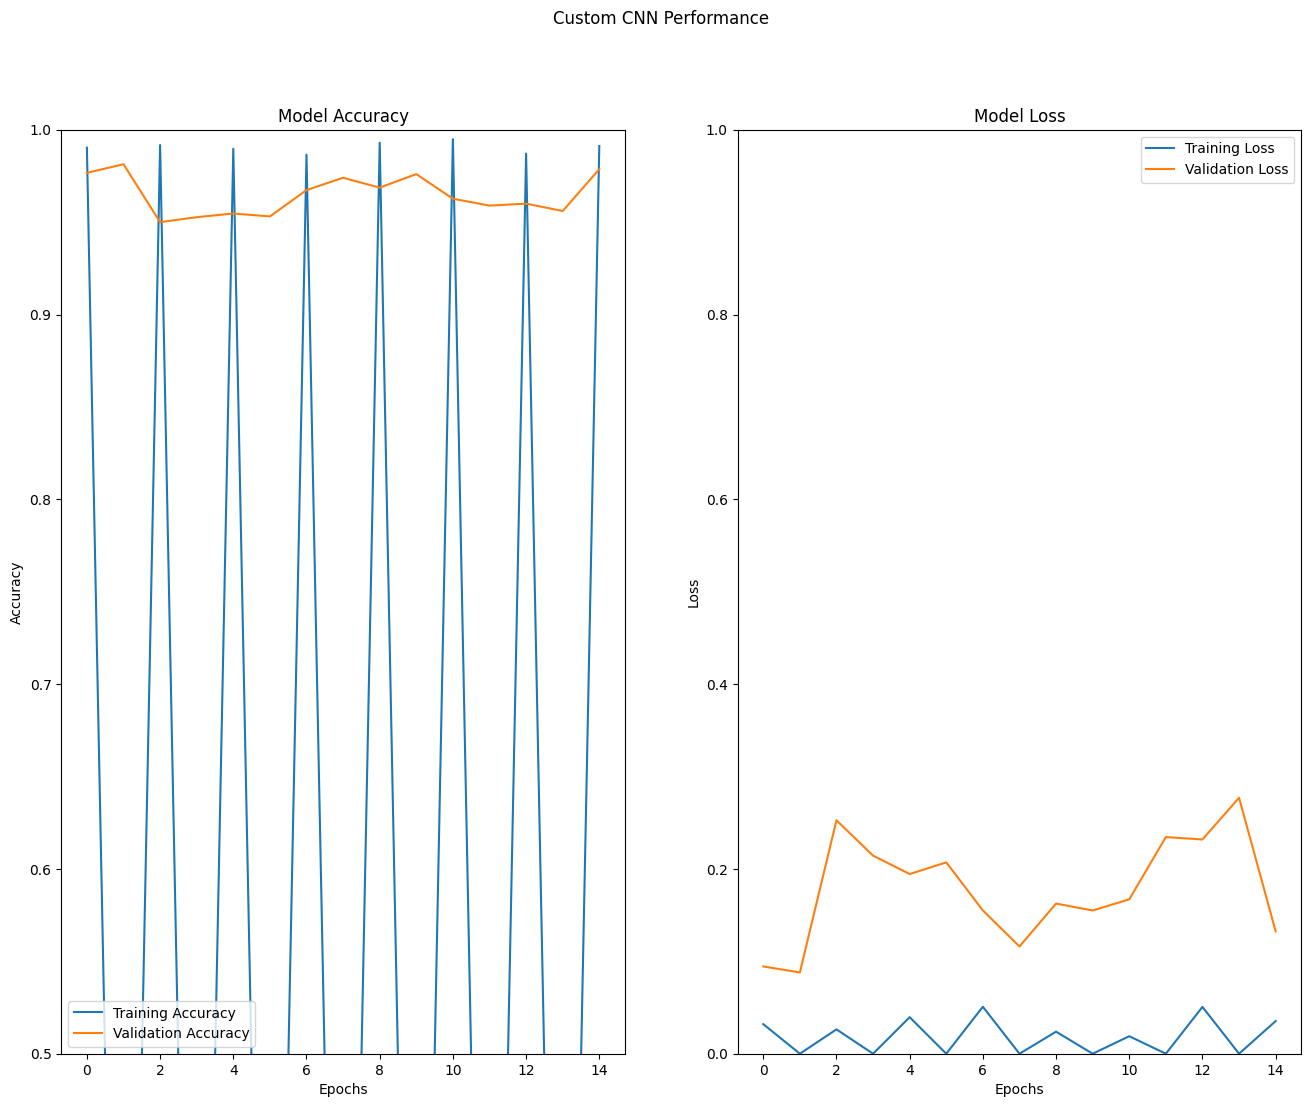

<Figure size 1000x700 with 0 Axes>

In [40]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

Preparing Test Data for Evaluation
--

__Tahers Work__

- Using the class indices keys that were acquired from the training dataset, the map_pred function associates predicted class indices with the labels of the associated traffic signs.
- Reads data from a CSV file (Test.csv) containing the test dataset.
- Takes the picture paths and class labels out of the dataset.
- Every image is received, converted to RGB format, resized to the correct size, and then appended to the data list iteratively.
- Divides by 255 to normalize the pixel values to fall within [0, 1] after converting the data list to a NumPy array.

This code block configures the test data and offer a way to evaluate the expected indices by mapping them back to the labels of the associated traffic signs.

__Modification and Reason for Modification__

**Dataset Source:**
* Taher's Approach: Utilized the 'Test.csv' file from the original dataset.
* Modified Approach: For testing, we changed it to the 'GT-final_test.csv' file as we had taken the input data from a shared tutorial.

**CSV File Structure:**
* Taher's Approach: Assumed a specific structure in the CSV file.
* Modified Approach: The format of 'GT-final_test.csv,' which uses a different delimiter (';'), required adjustments to the CSV file reading.

**Image Path Handling:**
* Taher's Approach: 'Path' column in the CSV file was used to construct the picture paths.
* Modified Approach: created picture paths that reflected modifications to the test dataset's file structure by using the 'Filename' column as a guide.

**Image Reading Path:**
* Taher's Approach: Read images from the 'data_dir.'
* Modified Approach: Take pictures from 'test_path,' which we changed since we are keeping the path to the photographs in this variable under "Data Directories and Image Dimensions."

The purpose of these changes is to guarantee that the structure of the updated test dataset and the test data processing procedure work together flawlessly. For a more accurate and representative assessment of the model's performance, adjustments are performed in response to modifications in the source, structure, and organization of the dataset.

In [64]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]

test_df = pd.read_csv(data_dir + 'Test.csv',delimiter=',')

test_labels = test_df["ClassId"].values
imgs = test_df["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(test_path +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

Error in Test/00000.png
Error in Test/00001.png
Error in Test/00002.png
Error in Test/00003.png
Error in Test/00004.png
Error in Test/00005.png
Error in Test/00006.png
Error in Test/00007.png
Error in Test/00008.png
Error in Test/00009.png
Error in Test/00010.png
Error in Test/00011.png
Error in Test/00012.png
Error in Test/00013.png
Error in Test/00014.png
Error in Test/00015.png
Error in Test/00016.png
Error in Test/00017.png
Error in Test/00018.png
Error in Test/00019.png
Error in Test/00020.png
Error in Test/00021.png
Error in Test/00022.png
Error in Test/00023.png
Error in Test/00024.png
Error in Test/00025.png
Error in Test/00026.png
Error in Test/00027.png
Error in Test/00028.png
Error in Test/00029.png
Error in Test/00030.png
Error in Test/00031.png
Error in Test/00032.png
Error in Test/00033.png
Error in Test/00034.png
Error in Test/00035.png
Error in Test/00036.png
Error in Test/00037.png
Error in Test/00038.png
Error in Test/00039.png
Error in Test/00040.png
Error in Test/00

Model Evaluation on Test Data
--

__Making Predictions:__
- pred = model.predict(X_test): Uses the trained model to predict class probabilities for the test data.

__Mapping Predictions:__
- pred = map_pred(pred.argmax(axis=-1)): Maps the predicted class indices to their corresponding traffic sign labels using the previously defined map_pred function.

__Accuracy Calculation:__
- accuracy_score(test_labels, pred) * 100: Calculates the accuracy of the model's predictions on the test data using scikit-learn's accuracy_score function.

__Print Accuracy:__
- print('Test Data accSuracy: ', accuracy_score(test_labels, pred) * 100): Prints the accuracy of the model on the test data.

The model may customize the final layers for the purpose of traffic sign categorization while utilizing the information from ImageNet by employing a pre-trained MobileNetV2 as a feature extractor.

In [65]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


ValueError: math domain error

Visualization of Model Predictions on Validation Data
--

__Validation Batch:__
- val_images, val_labels = test_dataset.next(): Retrieves a batch of validation images and labels from the test dataset.

__Predictions:__
- predicted = model.predict(val_images): Uses the trained model to predict class probabilities for the validation batch.
- predicts = map_pred(np.argmax(predicted, axis=-1)): Maps the predicted class indices to traffic sign labels using the map_pred function.
- labels = map_pred(np.argmax(val_labels, axis=-1)): Maps the true class indices to traffic sign labels.

__Visualization in Subplot Grid:__
- Generates a 3x4 subplot grid to display images along with their actual and predicted labels.
- If the prediction is correct, the title is displayed in green. If predicted incorrectly, it will be displayed in red.

With the use of this visualization, we may can evaluate the model's performance on specific photos from the validation dataset and get insight into both its advantages and disadvantages.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


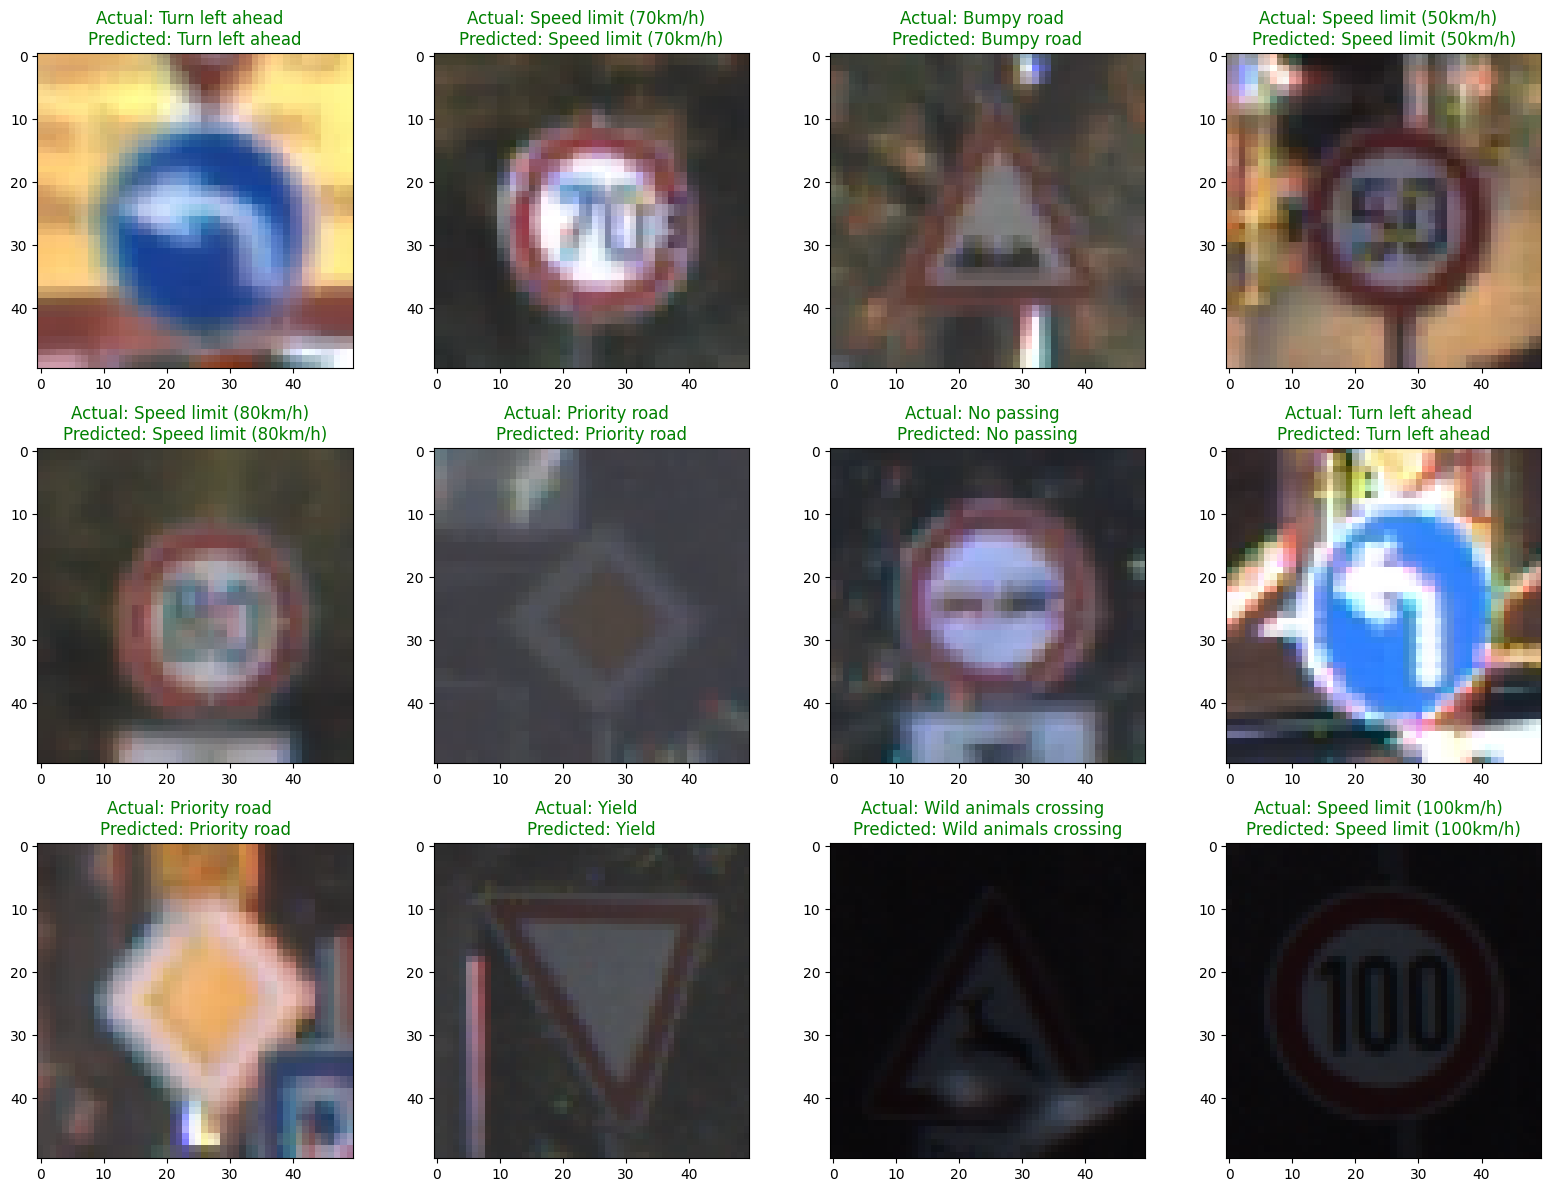

In [68]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = next(iter(test_dataset))
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()